In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir('D:\\Give Me Some Credit')

**一般分析流程**

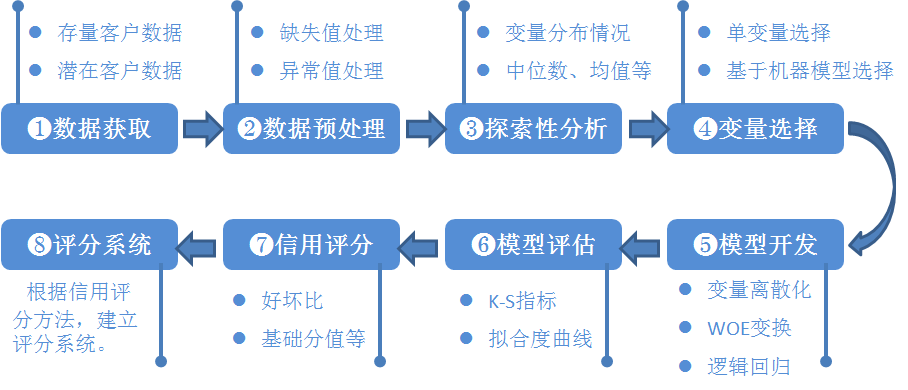

# 导入数据

In [2]:
T_data=pd.read_csv('cs-training.csv',header=0)
T_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
ID                                      150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [3]:
T_data=T_data.set_index('ID',drop=True) 
T_data.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
ID,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN


In [4]:
T_data.shape

(150000, 11)

In [4]:
states={'SeriousDlqin2yrs':'好坏客户',
        'RevolvingUtilizationOfUnsecuredLines':'可用额度比值',
        'age':'年龄',
        'NumberOfTime30-59DaysPastDueNotWorse':'逾期30-59天笔数',
        'DebtRatio':'负债率',
        'MonthlyIncome':'月收入',
        'NumberOfOpenCreditLinesAndLoans':'信贷数量',
        'NumberOfTimes90DaysLate':'逾期90天笔数',
        'NumberRealEstateLoansOrLines':'固定资产贷款量',
        'NumberOfTime60-89DaysPastDueNotWorse':'逾期60-89天笔数',
        'NumberOfDependents':'家属数量'}
T_data.rename(columns=states,inplace=True)
T_data.head()

,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
ID,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# 数据预处理

## 缺失值处理

月收入和家属数量存在缺失，进行填补

In [5]:
print("月收入缺失比:{:.2%}".format(T_data['月收入'].isnull().sum()/T_data.shape[0]))

月收入缺失比:19.82%


In [6]:
T_data['月收入'].isnull().sum()

29731

In [7]:
print("家属数量缺失比:{:.2%}".format(T_data['家属数量'].isnull().sum()/T_data.shape[0]))

家属数量缺失比:2.62%


In [8]:
T_data['家属数量'].isnull().sum()

3924

In [9]:
sum(T_data['好坏客户'])-T_data['好坏客户'][T_data['家属数量'].notnull()].sum() 
#删除家属缺失值存在的行样本，共删除了179个坏客户，3924-179=3745个好客户，对于150000个数量中坏客户10026来说，
#删除影响不大

179

月收入缺失值用平均值填充，家属数量缺失较少，将缺失的删掉

In [10]:
T_data=T_data.fillna({'月收入':T_data['月收入'].mean()})
df1=T_data.dropna()
df1.shape

(146076, 11)

## 异常值处理

都是数值型变量，画出箱线图和直方图

In [11]:
x1=df1['可用额度比值']
x2=df1['负债率']
x3=df1["年龄"]
x4=df1["逾期30-59天笔数"]
x5=df1["逾期60-89天笔数"]
x6=df1["逾期90天笔数"]
x7=df1["信贷数量"]
x8=df1["固定资产贷款量"]

d:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


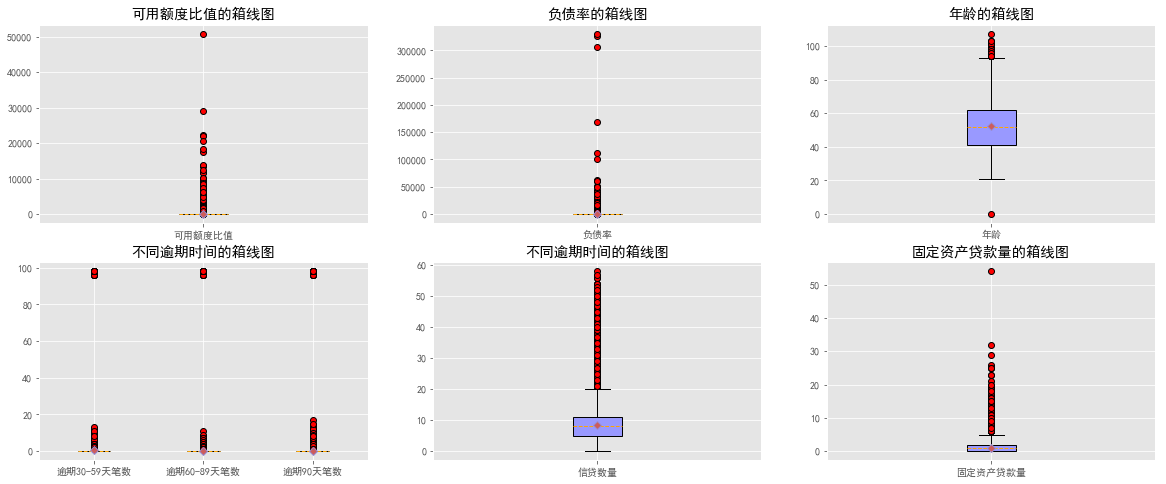

In [15]:
from matplotlib.font_manager import FontProperties
font=FontProperties(fname=r"C:\\Windows\\Fonts\\msyh.ttf",size=13)
plt.rcParams['font.sans-serif']=['SimHei']
## 箱线图
plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(20,8)) 
plt.subplot(231)
plt.boxplot(x=x1,patch_artist=True,showmeans=True,boxprops={'color':'black','facecolor':'#9999ff'},
           flierprops={'marker':'o','markerfacecolor':'red','color':'black'},meanprops={'marker':'D','markerfacecolor':'indianred'},
           medianprops={'linestyle':'--','color':'orange'},vert=True,labels=['可用额度比值'])
plt.title('可用额度比值的箱线图')
plt.tick_params(top='off',right='off')
plt.subplot(232)
plt.boxplot(x=x2,patch_artist=True,showmeans=True,boxprops={'color':'black','facecolor':'#9999ff'},
           flierprops={'marker':'o','markerfacecolor':'red','color':'black'},meanprops={'marker':'D','markerfacecolor':'indianred'},
           medianprops={'linestyle':'--','color':'orange'},vert=True,labels=['负债率'])
plt.title('负债率的箱线图')
plt.tick_params(top='off',right='off')

plt.subplot(233)
plt.boxplot(x=x3,patch_artist=True,showmeans=True,boxprops={'color':'black','facecolor':'#9999ff'},
           flierprops={'marker':'o','markerfacecolor':'red','color':'black'},meanprops={'marker':'D','markerfacecolor':'indianred'},
           medianprops={'linestyle':'--','color':'orange'},vert=True,labels=['年龄'])
plt.title('年龄的箱线图')
plt.tick_params(top='off',right='off')

plt.subplot(234)
plt.boxplot(x=[x4,x5,x6],patch_artist=True,showmeans=True,boxprops={'color':'black','facecolor':'#9999ff'},
           flierprops={'marker':'o','markerfacecolor':'red','color':'black'},meanprops={'marker':'D','markerfacecolor':'indianred'},
           medianprops={'linestyle':'--','color':'orange'},vert=True,labels=['逾期30-59天笔数','逾期60-89天笔数','逾期90天笔数'])
plt.title('不同逾期时间的箱线图')
plt.tick_params(top='off',right='off')

plt.subplot(235)
plt.boxplot(x=x7,patch_artist=True,showmeans=True,boxprops={'color':'black','facecolor':'#9999ff'},
           flierprops={'marker':'o','markerfacecolor':'red','color':'black'},meanprops={'marker':'D','markerfacecolor':'indianred'},
           medianprops={'linestyle':'--','color':'orange'},vert=True,labels=['信贷数量'])
plt.title('不同逾期时间的箱线图')
plt.tick_params(top='off',right='off')
plt.subplot(236)
plt.boxplot(x=x8,patch_artist=True,showmeans=True,boxprops={'color':'black','facecolor':'#9999ff'},
           flierprops={'marker':'o','markerfacecolor':'red','color':'black'},meanprops={'marker':'D','markerfacecolor':'indianred'},
           medianprops={'linestyle':'--','color':'orange'},vert=True,labels=['固定资产贷款量'])
plt.title('固定资产贷款量的箱线图')
plt.tick_params(top='off',right='off')
# plt.tight_layout() #防止图形之间重叠
plt.show()


异常值处理消除不合逻辑的数据和超级离群的数据，可用额度比值应该小于1，年龄为0的是异常值，逾期天数笔数大于80的是超级离群数据，固定资产贷款量大于50的是超级离群数据，将这些离群值过滤掉，筛选出剩余部分数据。

In [16]:
df1=df1[df1['可用额度比值']<1]
df1=df1[df1['年龄']>0]
df1=df1[df1['逾期30-59天笔数']<80]
df1=df1[df1['逾期60-89天笔数']<80]
df1=df1[df1['逾期90天笔数']<80]
df1=df1[df1['固定资产贷款量']<50]
df1.shape

(142559, 11)

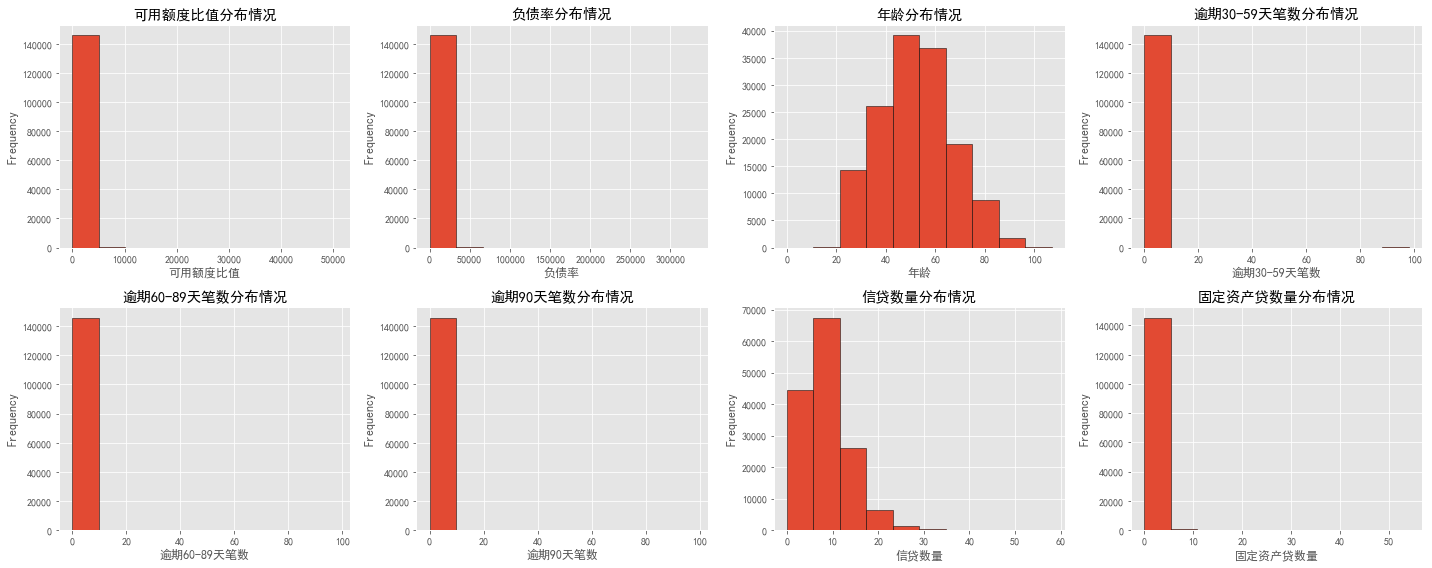

In [22]:
##直方图
from matplotlib.font_manager import FontProperties
font=FontProperties(fname=r"C:\\Windows\\Fonts\\msyh.ttf",size=13)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')
# plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=(20,8)) #调整图形大小
plt.subplot2grid((2,4),(0,0))
x1.plot(kind='hist',edgecolor='black')# 直方图 
plt.xlabel('可用额度比值')
plt.title("可用额度比值分布情况") # 标题

plt.subplot2grid((2,4),(0,1))
x2.plot(kind="hist",edgecolor='black')
plt.xlabel('负债率')
plt.title("负债率分布情况")

plt.subplot2grid((2,4),(0,2))
x3.plot(kind="hist",edgecolor='black')
plt.xlabel('年龄')
plt.title("年龄分布情况")

plt.subplot2grid((2,4),(0,3))
x4.plot(kind="hist",edgecolor='black')
plt.xlabel('逾期30-59天笔数')
plt.title("逾期30-59天笔数分布情况")

plt.subplot2grid((2,4),(1,0))
x5.plot(kind="hist",edgecolor='black')
plt.xlabel('逾期60-89天笔数')
plt.title("逾期60-89天笔数分布情况")

plt.subplot2grid((2,4),(1,1))
x6.plot(kind="hist",edgecolor='black')
plt.xlabel('逾期90天笔数')
plt.title("逾期90天笔数分布情况")

plt.subplot2grid((2,4),(1,2))
x7.plot(kind="hist",edgecolor='black')
plt.xlabel('信贷数量')
plt.title("信贷数量分布情况")

plt.subplot2grid((2,4),(1,3))
x8.plot(kind="hist",edgecolor='black')
plt.xlabel('固定资产贷数量')
plt.title("固定资产贷数量分布情况")
plt.tight_layout() #防止图形之间重叠
plt.show()

# 数据探索性分析

## 单变量分析
是分析一个自变量和因变量之间的联系，此处以年龄和好坏客户为例进行分析。
将年龄均分成5组，求出每组的总的用户数

In [23]:
age_cut=pd.cut(df1['年龄'],5)
age_cut_group=df1['好坏客户'].groupby(age_cut).count()
age_cut_group

年龄
(20.914, 38.2]    26984
(38.2, 55.4]      56660
(55.4, 72.6]      45709
(72.6, 89.8]      12640
(89.8, 107.0]       566
Name: 好坏客户, dtype: int64

求各组的坏客户数

In [24]:
age_cut_grouped1=df1["好坏客户"].groupby(age_cut).sum()
age_cut_grouped1

年龄
(20.914, 38.2]    2478
(38.2, 55.4]      4067
(55.4, 72.6]      1664
(72.6, 89.8]       273
(89.8, 107.0]       12
Name: 好坏客户, dtype: int64

In [31]:
df2=pd.merge(pd.DataFrame(age_cut_group),pd.DataFrame(age_cut_grouped1),left_index=True,right_index=True)
df2.rename(columns={'好坏客户_x':'总客户数','好坏客户_y':'坏客户数'},inplace=True)
df2

,总客户数,坏客户数
年龄,,
"(20.914, 38.2]",26984,2478
"(38.2, 55.4]",56660,4067
"(55.4, 72.6]",45709,1664
"(72.6, 89.8]",12640,273
"(89.8, 107.0]",566,12


In [32]:
df2.insert(2,"好客户数",df2["总客户数"]-df2["坏客户数"])
df2

,总客户数,坏客户数,好客户数
年龄,,,
"(20.914, 38.2]",26984,2478,24506
"(38.2, 55.4]",56660,4067,52593
"(55.4, 72.6]",45709,1664,44045
"(72.6, 89.8]",12640,273,12367
"(89.8, 107.0]",566,12,554


In [33]:
df2.insert(2,"坏客户占比",df2["坏客户数"]/df2["总客户数"])
df2

,总客户数,坏客户数,坏客户占比,好客户数
年龄,,,,
"(20.914, 38.2]",26984,2478,0.091832,24506
"(38.2, 55.4]",56660,4067,0.071779,52593
"(55.4, 72.6]",45709,1664,0.036404,44045
"(72.6, 89.8]",12640,273,0.021598,12367
"(89.8, 107.0]",566,12,0.021201,554


In [34]:
df2.index

CategoricalIndex([(20.914, 38.2], (38.2, 55.4], (55.4, 72.6], (72.6, 89.8],
                  (89.8, 107.0]],
                 categories=[(20.914, 38.2], (38.2, 55.4], (55.4, 72.6], (72.6, 89.8], (89.8, 107.0]], ordered=True, name='年龄', dtype='category')

Text(0.5, 1.0, '年龄与好坏客户数分布图')

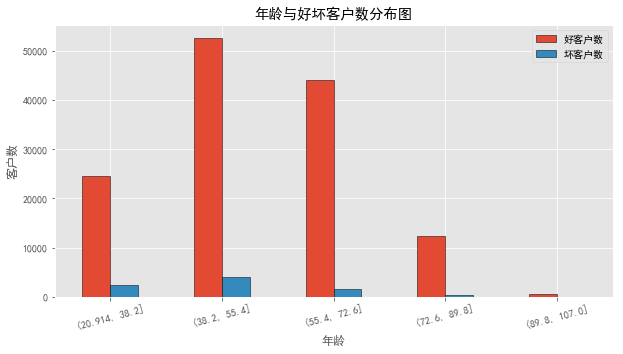

In [35]:
plt.style.use('ggplot')
# fig=plt.figure(figsize=(10,8))
plt.rcParams['font.sans-serif']=['SimHei']
# df2[["好客户数","坏客户数"]].plot(kind="bar",edgecolor='black')
ax1=df2[["好客户数","坏客户数"]].plot(kind="bar",edgecolor='black',figsize=(10,5))
ax1.set_xticklabels(df2.index,rotation=15)
ax1.set_ylabel("客户数")
ax1.set_title("年龄与好坏客户数分布图")

Text(0.5, 1.0, '坏客户率随年龄的变化趋势图')

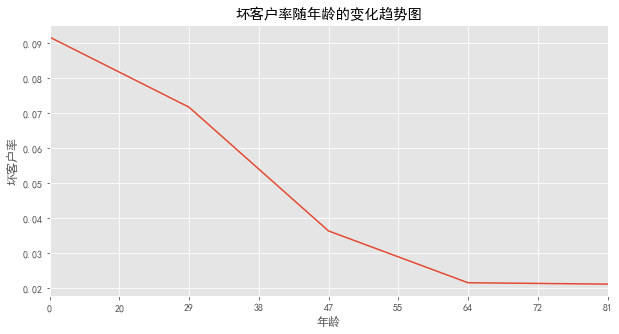

In [36]:
ax11=df2["坏客户占比"].plot(figsize=(10,5))
ax11.set_xticklabels([0,20,29,38,47,55,64,72,81,89,98,107])
ax11.set_ylabel("坏客户率")
ax11.set_title("坏客户率随年龄的变化趋势图")


可以看出随着年龄的增长，坏客户率在降低，其中38~55之间变化幅度最大

## 多变量分析
多变量分析就是对各个变量之间的相关性进行探索，线性回归模型中的特征之间由于存在精确相关关系或高度相关关系而使模型估计失真或难以估计准确，相关系数为1或者-1变量之间的相关性最大，对于相关性大的两组变量可以择一处理
 

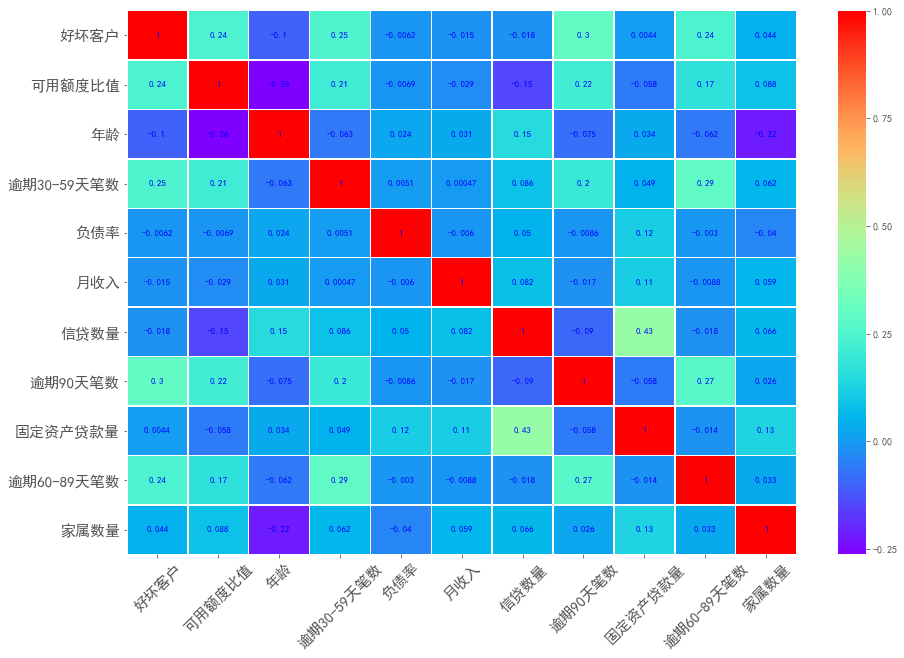

In [37]:
import seaborn as sns
corr = df1.corr()#计算各变量的相关性系数
xticks = list(corr.index)#x轴标签
yticks = list(corr.index)#y轴标签
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap="rainbow",ax=ax1,linewidths=.5, annot_kws={'size': 9, 'weight': 'bold', 'color': 'blue'})
ax1.set_xticklabels(xticks, rotation=45, fontsize=15)
ax1.set_yticklabels(yticks, rotation=0, fontsize=15)
plt.show()

可以看到各变量之间的相关性比较小，所以不需要操作，一般相关系数大于0.6可以进行变量剔除。

# 特征选择
**这里使用IV值进行特征选择**
- **WOE分箱**
- **WOE值计算**
- **IV值计算**
- **WOE值替换**

## WOE分箱

In [38]:
cut1=pd.qcut(df1["可用额度比值"],4,labels=False)
cut2=pd.qcut(df1["年龄"],8,labels=False)
bins3=[-1,0,1,3,5,13]
cut3=pd.cut(df1["逾期30-59天笔数"],bins3,labels=False)
cut4=pd.qcut(df1["负债率"],3,labels=False)
cut5=pd.qcut(df1["月收入"],4,labels=False)
cut6=pd.qcut(df1["信贷数量"],4,labels=False)
bins7=[-1, 0, 1, 3,5, 20]
cut7=pd.cut(df1["逾期90天笔数"],bins7,labels=False)
bins8=[-1, 0,1,2, 3, 33]
cut8=pd.cut(df1["固定资产贷款量"],bins8,labels=False)
bins9=[-1, 0, 1, 3, 12]
cut9=pd.cut(df1["逾期60-89天笔数"],bins9,labels=False)
bins10=[-1, 0, 1, 2, 3, 5, 21]
cut10=pd.cut(df1["家属数量"],bins10,labels=False)

In [39]:
cut1.value_counts()

3    35640
1    35640
0    35640
2    35639
Name: 可用额度比值, dtype: int64

## WOE计算

In [40]:
rate=df1["好坏客户"].sum()/(df1["好坏客户"].count()-df1["好坏客户"].sum())
def get_woe_data(cut):
    grouped=df1["好坏客户"].groupby(cut,as_index = True).value_counts()
    woe=np.log(grouped.unstack().iloc[:,1]/grouped.unstack().iloc[:,0]/rate)
    return woe
cut1_woe=get_woe_data(cut1)
cut2_woe=get_woe_data(cut2)
cut3_woe=get_woe_data(cut3)
cut4_woe=get_woe_data(cut4)
cut5_woe=get_woe_data(cut5)
cut6_woe=get_woe_data(cut6)
cut7_woe=get_woe_data(cut7)
cut8_woe=get_woe_data(cut8)
cut9_woe=get_woe_data(cut9)
cut10_woe=get_woe_data(cut10)

In [41]:
cut1_woe

可用额度比值
0   -1.203637
1   -1.135436
2   -0.247395
3    1.044468
dtype: float64

随便挑几个变量看下woe

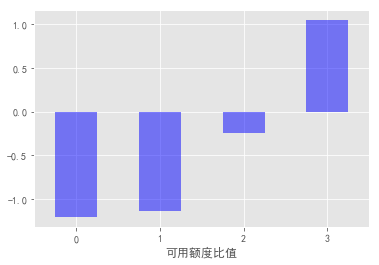

In [42]:
cut1_woe.plot.bar(color='b',alpha=0.5,rot=0)

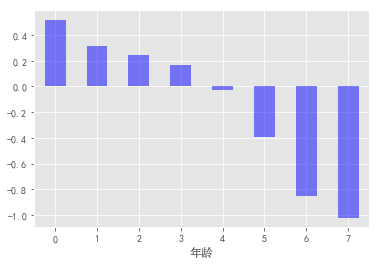

In [43]:
cut2_woe.plot.bar(color='b',alpha=0.5,rot=0)

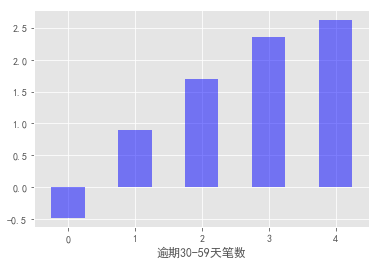

In [44]:
cut3_woe.plot.bar(color='b',alpha=0.5,rot=0)

可以看出woe已调整到具有单调性

## IV值计算

Text(0, 0.5, 'IV')

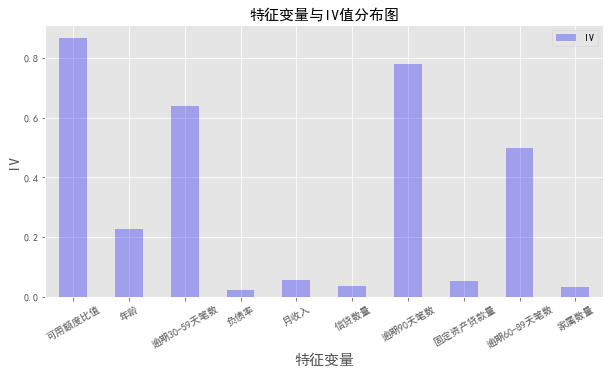

In [45]:
def get_IV_data(cut,cut_woe):
    grouped=df1["好坏客户"].groupby(cut,as_index = True).value_counts()
    cut_IV=((grouped.unstack().iloc[:,1]/df1["好坏客户"].sum()-grouped.unstack().iloc[:,0]/(df1["好坏客户"].count()-df1["好坏客户"].sum()))*cut_woe).sum()    
    return cut_IV
#计算各分组的IV值
cut1_IV=get_IV_data(cut1,cut1_woe)
cut2_IV=get_IV_data(cut2,cut2_woe)
cut3_IV=get_IV_data(cut3,cut3_woe)
cut4_IV=get_IV_data(cut4,cut4_woe)
cut5_IV=get_IV_data(cut5,cut5_woe)
cut6_IV=get_IV_data(cut6,cut6_woe)
cut7_IV=get_IV_data(cut7,cut7_woe)
cut8_IV=get_IV_data(cut8,cut8_woe)
cut9_IV=get_IV_data(cut9,cut9_woe)
cut10_IV=get_IV_data(cut10,cut10_woe)
IV=pd.DataFrame([cut1_IV,cut2_IV,cut3_IV,cut4_IV,cut5_IV,cut6_IV,cut7_IV,cut8_IV,cut9_IV,cut10_IV],index=['可用额度比值','年龄','逾期30-59天笔数','负债率','月收入','信贷数量','逾期90天笔数','固定资产贷款量','逾期60-89天笔数','家属数量'],columns=['IV'])
iv=IV.plot.bar(color='b',alpha=0.3,rot=30,figsize=(10,5),fontsize=(10))
iv.set_title('特征变量与IV值分布图',fontsize=(15))
iv.set_xlabel('特征变量',fontsize=(15))
iv.set_ylabel('IV',fontsize=(15))

In [46]:
IV

,IV
可用额度比值,0.867677
年龄,0.226285
逾期30-59天笔数,0.638915
负债率,0.021881
月收入,0.056417
信贷数量,0.035331
逾期90天笔数,0.780782
固定资产贷款量,0.052406
逾期60-89天笔数,0.497545
家属数量,0.033580


一般选取IV大于0.02的特征变量进行后续训练，从以上可以看出所有变量均满足，所以选取全部的

## WOE值替换

In [47]:
df_new=pd.DataFrame()   #新建df_new存放woe转换后的数据
def replace_data(cut,cut_woe):
    a=[]
    for i in cut.unique():
        a.append(i)
        a.sort()
    for m in range(len(a)):
        cut.replace(a[m],cut_woe.values[m],inplace=True)
    return cut
df_new["好坏客户"]=df1["好坏客户"]
df_new["可用额度比值"]=replace_data(cut1,cut1_woe)
df_new["年龄"]=replace_data(cut2,cut2_woe)
df_new["逾期30-59天笔数"]=replace_data(cut3,cut3_woe)
df_new["负债率"]=replace_data(cut4,cut4_woe)
df_new["月收入"]=replace_data(cut5,cut5_woe)
df_new["信贷数量"]=replace_data(cut6,cut6_woe)
df_new["逾期90天笔数"]=replace_data(cut7,cut7_woe)
df_new["固定资产贷款量"]=replace_data(cut8,cut8_woe)
df_new["逾期60-89天笔数"]=replace_data(cut9,cut9_woe)
df_new["家属数量"]=replace_data(cut10,cut10_woe)
df_new.head()

,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
ID,,,,,,,,,,,
1,1,1.044468,0.246969,1.701683,0.191066,-0.321369,0.045474,-0.345338,0.665870,-0.244603,0.197472
2,0,1.044468,0.316890,-0.476517,-0.151014,0.289489,0.222781,-0.345338,0.197418,-0.244603,0.097683
3,0,1.044468,0.316890,0.899640,-0.151014,0.289489,0.222781,1.990279,0.197418,-0.244603,-0.150675
4,0,-0.247395,0.518166,-0.476517,-0.151014,0.289489,0.222781,-0.345338,0.197418,-0.244603,-0.150675
5,0,1.044468,0.166515,0.899640,-0.151014,-0.321369,-0.255957,-0.345338,-0.235787,-0.244603,-0.150675


# 模型训练

信用评分卡主要使用的算法模型是逻辑回归。logistic模型客群变化的敏感度不如其他高复杂度模型，因此稳健更好，鲁棒性更强。另外，模型直观，系数含义好阐述、易理解，使用逻辑回归优点是可以得到一个变量之间的线性关系式和对应的特征权值，方便后面将其转成一一对应的分数形式。

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x=df_new.iloc[:,1:]
y=df_new.iloc[:,:1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=100,stratify=y)
model=LogisticRegression()
clf=model.fit(x_train,y_train)
print('测试成绩：{}'.format(clf.score(x_test,y_test)))

d:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


测试成绩：0.9420127197904976


求特征权值系数coe，后面训练结果转分值时会用到：

In [49]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
coe=clf.coef_        #特征权值系数，后面转换为打分规则时会用到
coe

array([[0.61412227, 0.41802156, 0.57438791, 1.11447783, 0.45374369,
        0.17471114, 0.58831607, 0.8187892 , 0.44824357, 0.34463511]])

In [51]:
# y_pred=clf.predict(x_test) #直接预测label为0或者为1
y_prob=clf.predict_proba(x_test) #预测出为0和为1的概率

In [52]:
y_prob

array([[0.88649914, 0.11350086],
       [0.91376342, 0.08623658],
       [0.98814305, 0.01185695],
       ...,
       [0.97985431, 0.02014569],
       [0.27433529, 0.72566471],
       [0.98009016, 0.01990984]])

In [53]:
y_prob[:,1]

array([0.11350086, 0.08623658, 0.01185695, ..., 0.02014569, 0.72566471,
       0.01990984])

In [54]:
y_pred

NameError: name 'y_pred' is not defined

# 模型评估
模型评估主要看AUC和K-S值

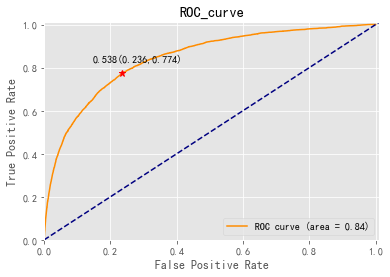

In [55]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1.01], [0, 1.01], color='navy',  linestyle='--')
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
right_index = list(np.array(tpr)- np.array(fpr))
# yuzhi = max(right_index)
# index = right_index.index(yuzhi)
index=np.argmax(right_index)
tpr_val = tpr[index]
fpr_val = fpr[index]
plt.plot(fpr_val,tpr_val,'*',color='red',markersize=7)
show_text=str(round(max(right_index),3))+'('+str(round(fpr_val,3))+','+str(round(tpr_val,3))+')'
plt.annotate(show_text,xytext=(fpr_val-0.09,tpr_val+0.05),xy=(fpr_val,tpr_val))
plt.show()

In [63]:
roc_auc

0.8436942711378628

最优阈值

In [64]:
max(right_index)

0.5379854091351569

In [67]:
threshold

array([1.96342986, 0.96342986, 0.95601587, ..., 0.00631866, 0.00619858,
       0.00606105])

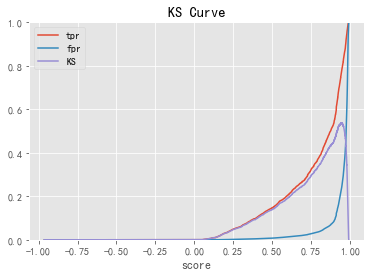

<Figure size 1440x1440 with 0 Axes>

In [61]:
fig, ax = plt.subplots()
ax.plot(1 - threshold, tpr, label='tpr') # ks曲线要按照预测概率降序排列，所以需要1-threshold镜像
ax.plot(1 - threshold, fpr, label='fpr')
ax.plot(1 - threshold, tpr-fpr,label='KS')
plt.xlabel('score')
plt.title('KS Curve')
plt.ylim([0.0, 1.0])
plt.figure(figsize=(20,20))
legend = ax.legend(loc='upper left')
plt.show()

In [62]:
max(tpr-fpr)

0.5379854091351569

ROC:0.84， K-S:0.53左右，建模效果一般

# 模型结果转评分

In [66]:
factor = 20 / np.log(2)
offset = 600 - 20 * np.log(20) / np.log(2)
def get_score(coe,woe,factor):
    scores=[]
    for w in woe:
        score=round(coe*w*factor,0)
        scores.append(score)
    return scores
x1 = get_score(coe[0][0], cut1_woe, factor)
x2 = get_score(coe[0][1], cut2_woe, factor)
x3 = get_score(coe[0][2], cut3_woe, factor)
x4 = get_score(coe[0][3], cut4_woe, factor)
x5 = get_score(coe[0][4], cut5_woe, factor)
x6 = get_score(coe[0][5], cut6_woe, factor)
x7 = get_score(coe[0][6], cut7_woe, factor)
x8 = get_score(coe[0][7], cut8_woe, factor)
x9 = get_score(coe[0][8], cut9_woe, factor)
x10 = get_score(coe[0][9], cut10_woe, factor)
print("可用额度比值对应的分数:{}".format(x1))
print("年龄对应的分数:{}".format(x2))
print("逾期30-59天笔数对应的分数:{}".format(x3))
print("负债率对应的分数:{}".format(x4))
print("月收入对应的分数:{}".format(x5))
print("信贷数量对应的分数:{}".format(x6))
print("逾期90天笔数对应的分数:{}".format(x7))
print("固定资产贷款量对应的分数:{}".format(x8))
print("逾期60-89天笔数对应的分数:{}".format(x9))
print("家属数量对应的分数:{}".format(x10))

可用额度比值对应的分数:[-21.0, -20.0, -4.0, 19.0]
年龄对应的分数:[6.0, 4.0, 3.0, 2.0, -0.0, -5.0, -10.0, -12.0]
逾期30-59天笔数对应的分数:[-8.0, 15.0, 28.0, 39.0, 44.0]
负债率对应的分数:[-5.0, -2.0, 6.0]
月收入对应的分数:[4.0, 1.0, -2.0, -4.0]
信贷数量对应的分数:[1.0, -1.0, -1.0, 0.0]
逾期90天笔数对应的分数:[-6.0, 34.0, 47.0, 56.0, 56.0]
固定资产贷款量对应的分数:[5.0, -6.0, -3.0, 2.0, 16.0]
逾期60-89天笔数对应的分数:[-3.0, 24.0, 35.0, 39.0]
家属数量对应的分数:[-1.0, 1.0, 2.0, 3.0, 4.0, 7.0]


# 计算用户总分
## 取自动分箱的边界分割点

In [68]:
cu1=pd.qcut(df1["可用额度比值"],4,labels=False,retbins=True)
bins1=cu1[1]
cu2=pd.qcut(df1["年龄"],8,labels=False,retbins=True)
bins2=cu2[1]

# bins3=[-1,0,1,3,5,13]
# cut3=pd.cut(df1["逾期30-59天笔数"],bins3,labels=False)
cu4=pd.qcut(df1["负债率"],3,labels=False,retbins=True)
bins4=cu4[1]
cu5=pd.qcut(df1["月收入"],4,labels=False,retbins=True)
bins5=cu5[1]
cu6=pd.qcut(df1["信贷数量"],4,labels=False,retbins=True)
bins6=cu6[1]

## 各变量对应的分数求和，算出每个用户的总分

In [69]:
def compute_score(series,bins,score):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(bins) - 2
        m = len(bins) - 2
        while j >= 0:
            if value >= bins[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(score[m])
        i += 1
    return list

In [70]:
test1=pd.read_csv('cs-test.csv',header=0)
test2=test1

In [71]:
test1['x1'] = pd.Series(compute_score(test1['RevolvingUtilizationOfUnsecuredLines'], bins1, x1))
test1['x2'] = pd.Series(compute_score(test1['age'], bins2, x2))
test1['x3'] = pd.Series(compute_score(test1['NumberOfTime30-59DaysPastDueNotWorse'], bins3, x3))
test1['x4'] = pd.Series(compute_score(test1['DebtRatio'], bins4, x4))
test1['x5'] = pd.Series(compute_score(test1['MonthlyIncome'], bins5, x5))
test1['x6'] = pd.Series(compute_score(test1['NumberOfOpenCreditLinesAndLoans'], bins6, x6))
test1['x7'] = pd.Series(compute_score(test1['NumberOfTimes90DaysLate'], bins7, x7))
test1['x8'] = pd.Series(compute_score(test1['NumberRealEstateLoansOrLines'], bins8, x8))
test1['x9'] = pd.Series(compute_score(test1['NumberOfTime60-89DaysPastDueNotWorse'], bins9, x9))
test1['x10'] = pd.Series(compute_score(test1['NumberOfDependents'], bins10, x10))
test1['Score'] = test1['x1']+test1['x2']+test1['x3']+test1['x4']+test1['x5']+test1['x6']+test1['x7']+test1['x8']+test1['x9']+test1['x10']+600

In [72]:
test1.to_csv('测试集用户得分表.csv',index=False)